##### Dealing with imbalanced dataset

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
scaler = preprocessing.MinMaxScaler() 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data
ccd = pd.read_csv('creditcard.csv')
print("Data Features :",ccd.columns)
print("Data Shape: ", ccd.shape)

Data Features : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Data Shape:  (284807, 31)


In [3]:
# Last 5 records of dataset
ccd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Checking for null values

ccd.isnull().sum().max()

# No null values



0

In [5]:
# Descriptive statitics
ccd.describe(percentiles=[0.25,0.5,0.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
99%,170560.940000,2.237130e+00,3.801811e+00,2.728434e+00,4.248032e+00,3.424903e+00,4.200085e+00,2.696205e+00,2.075973e+00,2.986773e+00,...,1.931852e+00,1.530152e+00,1.508703e+00,1.063748e+00,1.203955e+00,1.158698e+00,9.313604e-01,5.411264e-01,1017.970000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Data with label 1 (Fraud) is very less as compared to label 0 (not Fraud)
ccd.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [7]:
# Count of data where Amount is greater than approx 99 percentile

ccd[ccd['Amount']>1017].shape[0]

2852

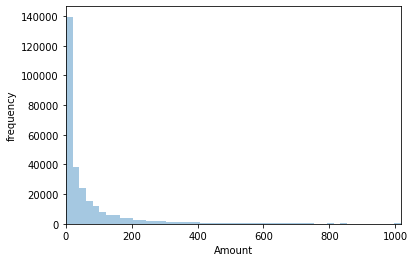

In [8]:
# Plotting distribution of Amount after removing some outliers - records greater than 99 percentile

ax=sns.distplot(ccd['Amount'],kde=False,hist_kws={'range':(0,1017)})
ax.set_xlim(0,1017)
plt.ylabel("frequency");


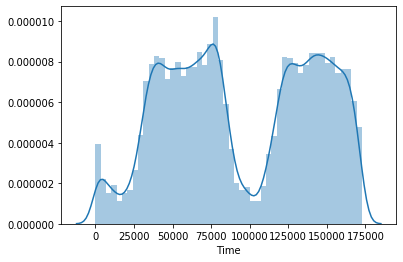

In [9]:
# Time - Number of seconds elapsed between this transaction and the first transaction in the dataset
sns.distplot(ccd['Time']);

##### Data Preprocessing

In [10]:
# Scaling the data which are not scaled, using MinMax Scalar as it is non distorting

scaler = preprocessing.MinMaxScaler() 
amount_scaled = scaler.fit_transform(ccd['Amount'].values.reshape(-1,1))
time_scaled= scaler.fit_transform(ccd['Time'].values.reshape(-1,1))
ccd['amount_scaled']=amount_scaled
ccd['time_scaled']=time_scaled

In [11]:
ccd.drop(['Amount','Time'],axis=1, inplace=True)

In [12]:
# Seperating features and label
X=ccd.loc[:,ccd.columns != 'Class']
y=ccd.loc[:,ccd.columns == 'Class']

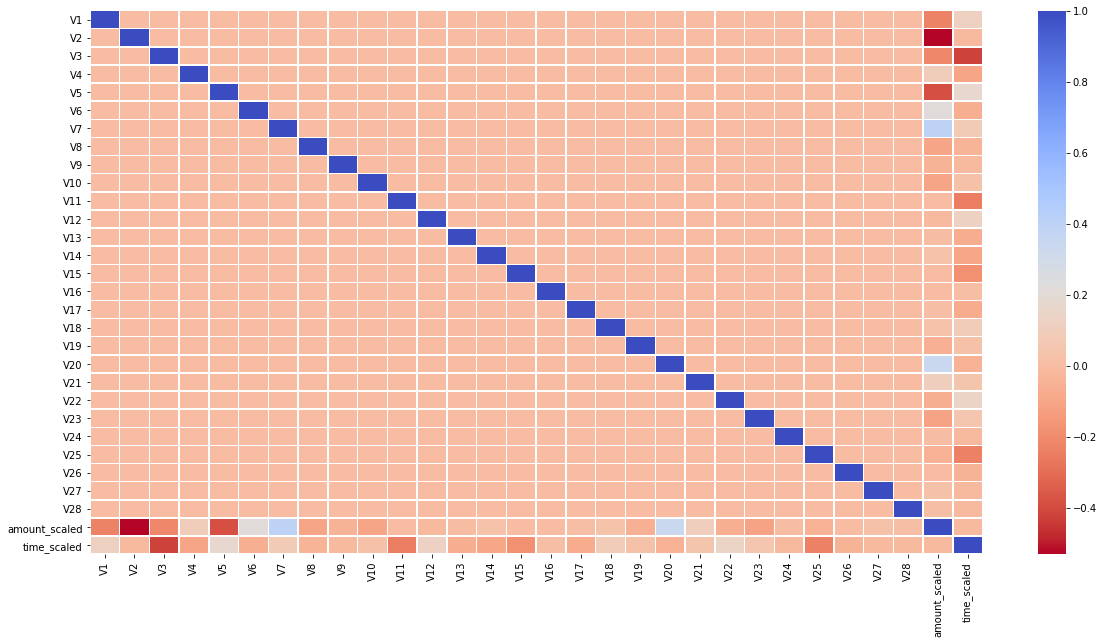

In [13]:
# To know whether there are any correlations between the features
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20,10))         
sns.heatmap(corrMatrix,cmap='coolwarm_r', linewidths=0.5, ax=ax)
plt.show()

# plot shows strong negative correlations between V2-amount, V5-amount, V3-time

##### Running Model

In [14]:
# Splitting dataset retaining the proprotion of class labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=8,stratify=y)

print("label distribution for training datset: ", y_train.groupby('Class').size())
print("label distribution for testing datset: ", y_test.groupby('Class').size())

label distribution for training datset:  Class
0    199020
1       344
dtype: int64
label distribution for testing datset:  Class
0    85295
1      148
dtype: int64


In [37]:
# Classifying without balancing the imbalanced dataset

r1=RandomForestClassifier()
r1.fit(X_train, y_train)
y_pred=r1.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# Training the data as-is gives pretty decent outcome, but the model is prone to over-fit and have to see how will it perform with new fradulent data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.83      0.83        99

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56847    16]
 [   17    82]]


#####  UnderSampling the majority class

In [16]:
# Training model with equal proportion of class labels by undersampling method 1

# Training data
ccd_1=ccd[ccd.Class==0].sample(344, replace=False)
ccd_2=ccd[ccd.Class==1].sample(frac=0.7, replace=False)
ccd_u=pd.concat([ccd_1,ccd_2])

# Testing data - all remaining data
r=list(ccd_u.index) 
ccd_rem=ccd[~ccd.index.isin(r)]

# Seperating features and labels
X_u=ccd_u.loc[:,ccd_u.columns != 'Class']
y_u=ccd_u.loc[:,ccd_u.columns == 'Class']

X_rem=ccd_rem.loc[:,ccd_u.columns != 'Class']
y_rem=ccd_rem.loc[:,ccd_u.columns == 'Class']

print("Classification of Training data: ",y_u.groupby('Class').size())
print("Classification of test data: ",y_rem.groupby('Class').size())




Classification of Training data:  Class
0    344
1    344
dtype: int64
Classification of test data:  Class
0    283971
1       148
dtype: int64


In [36]:
r2=RandomForestClassifier()
r2.fit(X_u,y_u)
y_f=r2.predict(X_rem)
print(classification_report(y_rem,y_f))
print(confusion_matrix(y_rem,y_f))

# Training the data with only 0.2% of overall data so as to make it balanced is prone to underfit and there are many records which are wrongly identified as fraudelent

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    283971
           1       0.02      0.92      0.03       148

    accuracy                           0.97    284119
   macro avg       0.51      0.94      0.51    284119
weighted avg       1.00      0.97      0.98    284119

[[275276   8695]
 [    12    136]]


In [20]:
# Training model with equal proportion of class labels by undersampling method 2

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=8,stratify=y)


from imblearn.under_sampling import NearMiss 
nr = NearMiss(version=3) 

X_nr, y_nr = nr.fit_sample(X_train, y_train) # Using training data set to prevent data leakage

print("After undersampling")
print("Training Data Size: ",y_nr.groupby("Class").size())
print("Testing Data Size: ",y_test.groupby("Class").size())

r3=RandomForestClassifier()
r3.fit(X_nr, y_nr)
y_pred=r3.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# Training the data with only 0.2% of overall data so as to make it balanced is prone to underfit and there are many records which are wrongly identified as fraudelent

After undersampling
Training Data Size:  Class
0    296
1    344
dtype: int64
Testing Data Size:  Class
0    85295
1      148
dtype: int64
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.17      0.82      0.28       148

    accuracy                           0.99     85443
   macro avg       0.58      0.91      0.64     85443
weighted avg       1.00      0.99      1.00     85443

[[84685   610]
 [   27   121]]


##### Oversampling the minority class

In [22]:
# Using Stratified Shuffle split to seperate testing and training data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

In [23]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()

r4=RandomForestClassifier()
                                

for train_idx, test_idx in skf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    X_train, y_train = smote_enn.fit_sample(X_train, y_train) # oversample only training dataset to prevent leakage to test data
    r4.fit(X_train,y_train)
    y_pred=r4.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    break

    
print("After Oversampling")
print("Training Data Size: ",y_train.groupby("Class").size())
print("Testing Data Size: ",y_test.groupby("Class").size())

# Training the data set by oversampling is likely to be effective (specially in terms of recall) for the unseen data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.80      0.83        99

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56850    13]
 [   20    79]]
After Oversampling
Training Data Size:  Class
0    227120
1    227452
dtype: int64
Testing Data Size:  Class
0    56863
1       99
dtype: int64


##### Conclusion

1. Training the data as-is gives decent outcome, but the model is prone to over-fit and have to see how will it perform with new unseen data, especially the recall score. 
2. Training the data with balanced dataset by undersampling the data with only 0.2% of overall data is prone to underfit and there are many records which are wrongly identified as fraudelent
3. Training the data with balanced dataset by oversampling is expected to be effective (especially in terms of recall) for the unseen data